# Titanic Survival Prediction

1. Understanding the Problem Statement
1. Data Collection
1. Data Checks to perform
1. Exploratory data analysis
1. Data Pre-Processing

1. Problem statement

In this Project we are trying to build a predictive model to know what sorts 0f people were more likely to survive Using Passenger Data


2. Data Collection

Dataset Source - https://www.kaggle.com/competitions/titanic/data


2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')


Import CSV Data as Pandas DataFrame

In [7]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

Show Top 5 Records

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dataset Shape

In [10]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

2.2 Dataset Information

• survival: Survival → 0 = No, 1 = Yes  
• pclass: Ticket class → 1 = 1st, 2 = 2nd, 3 = 3rd  
• sex: Sex  
• age: Age in years  
• sibsp: Number of siblings/spouses aboard the Titanic  
• parch: Number of parents/children aboard the Titanic  
• ticket: Ticket number  
• fare: Passenger fare  
• cabin: Cabin number  
• embarked: Port of Embarkation → C = Cherbourg, Q = Queenstown, S = Southampton  


3. Data Checks to perform

• Check missing values  
• Check for duplicates  
• Check data types  
• Check the number of unique values in each column  
• Check dataset statistics  
• Check categories in each categorical column  


3.1 Check Missing Values

In [11]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3.2 Check Duplicates 

In [12]:
df_train.duplicated().sum()

np.int64(0)

3.3 Check Data Types

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3.4 Check number of unique value for each column

In [16]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

3.5 Check Dataset Statistics

In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3.7 Explore Data

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:



print("Categories in 'Survived' variable:       ", end=" ")
print(df_train['Survived'].unique())

print("Categories in 'Pclass' variable:          ", end=" ")
print(df_train['Pclass'].unique())


print("Categories in 'Sex' variable:              ", end=" ")
print(df_train['Sex'].unique())


print("Categories in 'SibSp' variable:            ", end=" ")
print(df_train['SibSp'].unique())

print("Categories in 'Parch' variable:            ", end=" ")
print(df_train['Parch'].unique())


print("Categories in 'Embarked' variable:         ", end=" ")
print(df_train['Embarked'].unique())



Categories in 'Survived' variable:        [0 1]
Categories in 'Pclass' variable:           [3 1 2]
Categories in 'Sex' variable:               ['male' 'female']
Categories in 'SibSp' variable:             [1 0 3 4 2 5 8]
Categories in 'Parch' variable:             [0 1 2 5 3 4 6]
Categories in 'Embarked' variable:          ['S' 'C' 'Q' nan]


3.8 Add columns for Family

In [27]:
df_train['family'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
individual_with_family = (df_train['family'] > 0).sum()
individual_without_family = (df_train['family'] == 0).sum()
print(f'Number of people with family is {individual_with_family}')
print(f'Number of people without family is {individual_without_family}')

Number of people with family is 354
Number of people without family is 537


4. Explore Data (Visualization)

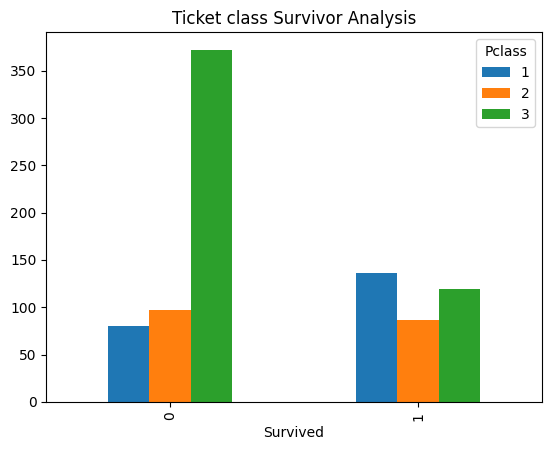

In [35]:
pd.crosstab(df_train['Survived'], df_train['Pclass']).plot(kind='bar', title='Ticket class Survivor Analysis');

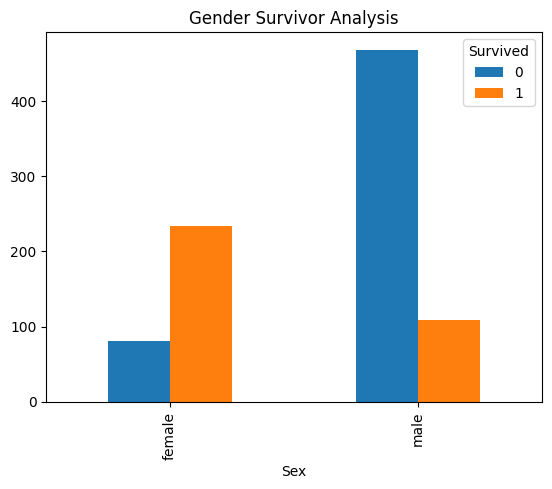

In [36]:
pd.crosstab(df_train['Sex'], df_train['Survived']).plot(kind='bar',title='Gender Survivor Analysis');

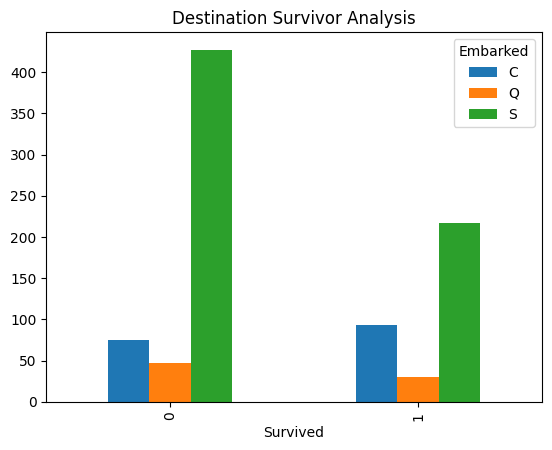

In [37]:
pd.crosstab(df_train['Survived'], df_train['Embarked']).plot(kind='bar', title='Destination Survivor Analysis');

In [39]:
# Create Column Transformer with 3 types of transformers
num_features = df_train.select_dtypes(exclude="object").columns
cat_features = df_train.select_dtypes(include="object").columns

In [40]:
num_features, cat_features

(Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
        'family'],
       dtype='object'),
 Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'))

In [41]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family'],
      dtype='object')

In [59]:
df_train.head(2)
              

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs


In [43]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
family           int64
dtype: object

In [49]:
import re
def extract_title(name):
    match = re.search(r',\s*([^\.]+)\.', name)
    return match.group(1).strip() if match else 'Missing'

In [50]:
def extract_ticket_prefix(ticket):
    parts = ticket.split()
    if len(parts) > 1:
        return parts[0].replace('.', '').replace('/', '').upper()
    else:
        return 'None'

In [62]:
df_train['Ticket_update'] = df_train['Ticket'].apply(extract_ticket_prefix)
df_train['Ticket_update'].unique()

array(['A5', 'PC', 'STONO2', 'None', 'PP', 'CA', 'SCPARIS', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SOP', 'FA',
       'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC',
       'SOTONO2', 'CASOTON'], dtype=object)

In [58]:
df_train['Title'] = df_train['Name'].apply(extract_title)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr
